<a href="https://colab.research.google.com/github/TalysMihaliuc/Python/blob/main/Churn_com_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sistema de Classificação
***
Vamos entender qual o grupo tem mais probabilidade de CHURN com o KNN

In [3]:
import pandas as pd
import numpy as np

In [4]:
# lendo arquivo

dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv')

In [5]:
# Tamanho do arquivo
dados.shape

(7043, 18)

In [6]:
dados.head()

Maior65Anos Conjuge Dependentes  MesesDeContrato TelefoneFixo  \
0            0     Sim         Nao                1          Nao   
1            0     Nao         Nao               34          Sim   
2            0     Nao         Nao                2          Sim   
3            0     Nao         Nao               45          Nao   
4            0     Nao         Nao                2          Sim   

  VariasLinhasTelefonicas ServicoDeInternet SegurancaOnline BackupOnline  \
0    SemServicoTelefonico               DSL             Nao          Sim   
1                     Nao               DSL             Sim          Nao   
2                     Nao               DSL             Sim          Sim   
3    SemServicoTelefonico               DSL             Sim          Nao   
4                     Nao       FibraOptica             Nao          Nao   

  SeguroNoDispositivo SuporteTecnico TVaCabo StreamingDeFilmes TipoDeContrato  \
0                 Nao            Nao     Nao               Nao    Mensalmente   
1                 Sim            Nao     Nao               Nao          UmAno   
2                 Nao            Nao     Nao               Nao    Mensalmente   
3                 Sim            Sim     Nao               Nao          UmAno   
4                 Nao            Nao     Nao               Nao    Mensalmente   

  PagamentoOnline FormaDePagamento  ContaMensal Churn  
0             Sim    ChequeDigital        29.85   Nao  
1             Nao      ChequePapel        56.95   Nao  
2             Sim      ChequePapel        53.85   Sim  
3             Nao    DebitoEmConta        42.30   Nao  
4             Sim    ChequeDigital        70.70   Sim

In [7]:
#modificação dados Manual
traducao_dic = {'Sim': 1, 
                'Nao': 0}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

Conjuge  Dependentes  TelefoneFixo  PagamentoOnline  Churn
0        1            0             0                1      0
1        0            0             1                0      0
2        0            0             1                1      1
3        0            0             0                0      0
4        0            0             1                1      1

# Encoding de Variáveis
***

In [8]:
#modificação pelo get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                axis=1))
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)

In [9]:
pd.set_option('display.max_columns', 39)
dados_final.head()

Conjuge  Dependentes  TelefoneFixo  PagamentoOnline  Churn  Maior65Anos  \
0        1            0             0                1      0            0   
1        0            0             1                0      0            0   
2        0            0             1                1      1            0   
3        0            0             0                0      0            0   
4        0            0             1                1      1            0   

   MesesDeContrato  ContaMensal  VariasLinhasTelefonicas_Nao  \
0                1        29.85                            0   
1               34        56.95                            1   
2                2        53.85                            1   
3               45        42.30                            0   
4                2        70.70                            1   

   VariasLinhasTelefonicas_SemServicoTelefonico  VariasLinhasTelefonicas_Sim  \
0                                             1                            0   
1                                             0                            0   
2                                             0                            0   
3                                             1                            0   
4                                             0                            0   

   ServicoDeInternet_DSL  ServicoDeInternet_FibraOptica  \
0                      1                              0   
1                      1                              0   
2                      1                              0   
3                      1                              0   
4                      0                              1   

   ServicoDeInternet_Nao  SegurancaOnline_Nao  \
0                      0                    1   
1                      0                    0   
2                      0                    0   
3                      0                    0   
4                      0                    1   

   SegurancaOnline_SemServicoDeInternet  SegurancaOnline_Sim  \
0                                     0                    0   
1                                     0                    1   
2                                     0                    1   
3                                     0                    1   
4                                     0                    0   

   BackupOnline_Nao  BackupOnline_SemServicoDeInternet  BackupOnline_Sim  \
0                 0                                  0                 1   
1                 1                                  0                 0   
2                 0                                  0                 1   
3                 1                                  0                 0   
4                 1                                  0                 0   

   SeguroNoDispositivo_Nao  SeguroNoDispositivo_SemServicoDeInternet  \
0                        1                                         0   
1                        0                                         0   
2                        1                                         0   
3                        0                                         0   
4                        1                                         0   

   SeguroNoDispositivo_Sim  SuporteTecnico_Nao  \
0                        0                   1   
1                        1                   1   
2                        0                   1   
3                        1                   0   
4                        0                   1   

   SuporteTecnico_SemServicoDeInternet  SuporteTecnico_Sim  TVaCabo_Nao  \
0                                    0                   0            1   
1                                    0                   0            1   
2                                    0                   0            1   
3                                    0                   1            1   
4                                    0                   0         

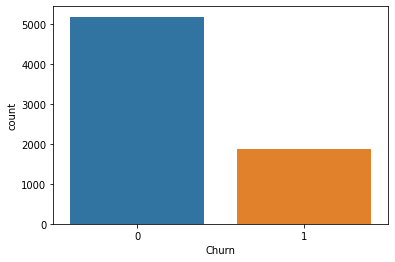

In [10]:
#Balanceamento de dados
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data=dados_final)

In [11]:
dados_final.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [12]:
#biblioteca para balancear os dados utilizando over_sampling
from imblearn.over_sampling import SMOTE

In [13]:
#dividindo os dados em caracteristicas e target
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [14]:
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

In [15]:
dados_final = pd.concat([X, y], axis=1)

In [16]:
#Verificação e junção dos dados
dados_final.head(2)


Conjuge  Dependentes  TelefoneFixo  PagamentoOnline  Maior65Anos  \
0        1            0             0                1            0   
1        0            0             1                0            0   

   MesesDeContrato  ContaMensal  VariasLinhasTelefonicas_Nao  \
0                1        29.85                            0   
1               34        56.95                            1   

   VariasLinhasTelefonicas_SemServicoTelefonico  VariasLinhasTelefonicas_Sim  \
0                                             1                            0   
1                                             0                            0   

   ServicoDeInternet_DSL  ServicoDeInternet_FibraOptica  \
0                      1                              0   
1                      1                              0   

   ServicoDeInternet_Nao  SegurancaOnline_Nao  \
0                      0                    1   
1                      0                    0   

   SegurancaOnline_SemServicoDeInternet  SegurancaOnline_Sim  \
0                                     0                    0   
1                                     0                    1   

   BackupOnline_Nao  BackupOnline_SemServicoDeInternet  BackupOnline_Sim  \
0                 0                                  0                 1   
1                 1                                  0                 0   

   SeguroNoDispositivo_Nao  SeguroNoDispositivo_SemServicoDeInternet  \
0                        1                                         0   
1                        0                                         0   

   SeguroNoDispositivo_Sim  SuporteTecnico_Nao  \
0                        0                   1   
1                        1                   1   

   SuporteTecnico_SemServicoDeInternet  SuporteTecnico_Sim  TVaCabo_Nao  \
0                                    0                   0            1   
1                                    0                   0            1   

   TVaCabo_SemServicoDeInternet  TVaCabo_Sim  StreamingDeFilmes_Nao  \
0                             0            0                      1   
1                             0            0                      1   

   StreamingDeFilmes_SemServicoDeInternet  StreamingDeFilmes_Sim  \
0                                       0                      0   
1                                       0                      0   

   TipoDeContrato_DoisAnos  TipoDeContrato_Mensalmente  TipoDeContrato_UmAno  \
0                        0                           1                     0   
1                        0                           0                     1   

   FormaDePagamento_CartaoDeCredito  FormaDePagamento_ChequeDigital  \
0                                 0                               1   
1                                 0                               0   

   FormaDePagamento_ChequePapel  FormaDePagamento_DebitoEmConta  Churn  
0                             0                               0      0  
1                             1                               0      0

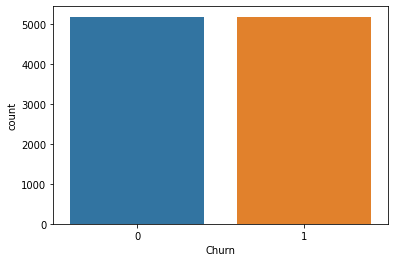

In [17]:
#Verificação de Balanceamento 
ax = sns.countplot(x='Churn', data=dados_final)

In [18]:
dados_final.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# Modelo K-Nearest Neighbors (KNN)
***

1. Receber informações
2. Calcular as distâncias
3. Ordenar da menor distância para a maior
4. Fazer uma contagem das classes

k muito pequeno -> Overfitting

k muito grande -> underfitting

In [19]:
#Divisão em imputs e outputs
x = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

In [20]:
#Pradronizar os dados
from sklearn.preprocessing import StandardScaler

# Normalização
***
Seleciona cada um dos atributos subitrai a média e divide pelo desvio padrão

Utilizando <b>distância Euclidiana:</b>
 
Raiz quadrada do somatório, da diferença de todos os atributos elevado ao quadrado 



In [21]:
#deixar todos os dados na mesma Escala
norm = StandardScaler()
x_normalizado = norm.fit_transform(x)
x_normalizado


array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215]])

# Implementando Modelo
***

In [22]:
from sklearn.model_selection import train_test_split  

In [23]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_normalizado, y, test_size=0.3, random_state=123)

Treino Teste
***

In [24]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [25]:
#Instanciar o modelo (criamos o modelo) - por padrão são 5 vizinhos
knn = KNeighborsClassifier(metric='euclidean')

In [26]:
#Treinando o modelo com os dados de treino
knn.fit(x_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [27]:
#testado o modelo com os dados de teste
predito_knn = knn.predict(x_teste)

In [28]:
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

#Método Probabilistico

In [29]:
#Escolho utilizar mediana, porque é o valor central dos nosso dados ordenados
np.median(x_treino)

-0.4461759755508453

In [30]:
#Biblioteca para criarmor o modelo machine Learning
from sklearn.naive_bayes import BernoulliNB

In [31]:
#criando o modelo
bnb = BernoulliNB(binarize=-0.44)

In [32]:
bnb.fit(x_treino,y_treino)

BernoulliNB(binarize=-0.44)

In [33]:
predito_Bnb = bnb.predict(x_teste)

In [34]:
predito_Bnb

array([1, 0, 0, ..., 1, 1, 1])

# Arvore de decisão

In [35]:
#Importando biblioteca 
from sklearn.tree import DecisionTreeClassifier

In [36]:
#Instanciando o Modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)


In [37]:
#treinar o modelo
dtc.fit(x_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [38]:
#Verificar importancia dos atributos
dtc.feature_importances_

array([0.02100894, 0.01395648, 0.0068095 , 0.01987306, 0.01892071,
       0.16274644, 0.22207834, 0.00929414, 0.00344576, 0.01033768,
       0.0019815 , 0.03131262, 0.00065123, 0.00849934, 0.        ,
       0.01698366, 0.00622973, 0.        , 0.00964718, 0.01267467,
       0.00027769, 0.00770208, 0.01306512, 0.00368329, 0.02048744,
       0.00371587, 0.        , 0.00156955, 0.00671244, 0.0003825 ,
       0.01126638, 0.03611651, 0.16384005, 0.07422263, 0.01760111,
       0.02127213, 0.02182911, 0.01980513])

In [39]:
predito_ArvoreDecisa = dtc.predict(x_teste)

In [40]:
predito_ArvoreDecisa

array([0, 0, 0, ..., 1, 1, 1])

# Matriz de confusão

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
print(confusion_matrix(y_teste,predito_knn))

[[1241  328]
 [ 247 1289]]


In [45]:
print(confusion_matrix(y_teste,predito_Bnb))

[[1050  519]
 [ 242 1294]]


In [46]:
print(confusion_matrix(y_teste,predito_ArvoreDecisa))

[[1249  320]
 [ 277 1259]]


#Acurácia

Mede o quanto o modelo acertou no total de todas as métricas (total positivos + total negativos) / total 

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
#modelo KNN
print(accuracy_score(y_teste,predito_knn))

0.8148148148148148


In [51]:
#modelo Bernoulli de naive bayes
print(accuracy_score(y_teste,predito_Bnb))

0.7549114331723027


In [52]:
#modelo Árvore de decisão
print(accuracy_score(y_teste,predito_ArvoreDecisa))

0.8077294685990338


# Precisão

Calcula quantos foram classificados corretamente como positivos (TP) = Total de positivos / falso positvo + verdadeiro positivo

In [60]:
from sklearn.metrics import precision_score

In [61]:
#modelo KNN
print(precision_score(y_teste,predito_knn))

0.7971552257266543


In [62]:
#modelo Bernoulli de naive bayes
print(precision_score(y_teste,predito_Bnb))

0.7137341423055709


In [63]:
#modelo Árvore de decisão
print(precision_score(y_teste,predito_ArvoreDecisa))

0.7973400886637112


#Recall

Calcula o quão bom o modelo está para calassificar corretamente um resultado positivo

In [65]:
from sklearn.metrics import recall_score

In [66]:
#modelo KNN
print(recall_score(y_teste,predito_knn))

0.8391927083333334


In [67]:
#modelo Bernoulli de naive bayes
print(recall_score(y_teste,predito_Bnb))

0.8424479166666666


In [68]:
#modelo Árvore de decisão
print(recall_score(y_teste,predito_ArvoreDecisa))

0.8196614583333334


# Escolhendo o modelo

Para prever o churn é melhor o modelo que apresenta mais acertividade para cacular o valor positivo real então vamos avaliar as metricas do  Recall 

In [69]:
#Exemplo  - Análise da sensibilidade calculadas pelo Recall
print('Modelo KNN', recall_score(y_teste,predito_knn))
print('Modelo Bernoulli de Naive Bayes', recall_score(y_teste,predito_Bnb))
print('Modelo Arvore de Descisão', recall_score(y_teste,predito_ArvoreDecisa))


Modelo KNN 0.8391927083333334
Modelo Bernoulli de Naive Bayes 0.8424479166666666
Modelo Arvore de Descisão 0.8196614583333334
